In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
path ='LogiReg_data.txt'
pdData = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0,0.5,'Exam 2 Score')

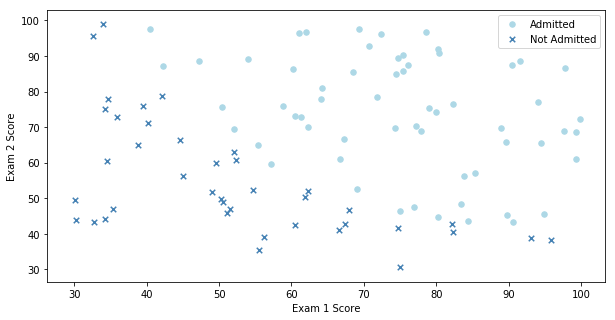

In [2]:
positive = pdData[pdData['Admitted'] == 1] 
negative = pdData[pdData['Admitted'] == 0] 

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='lightblue', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='steelblue', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

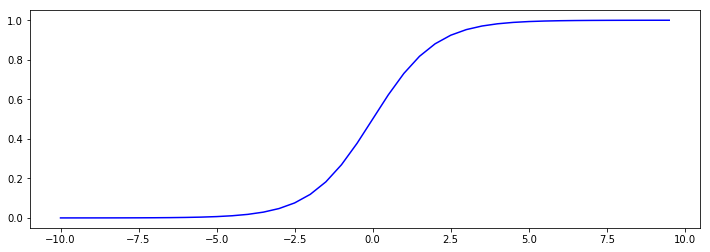

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
nums = np.arange(-10, 10, step=0.5) 
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(nums, sigmoid(nums), 'b')

In [4]:
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

In [5]:
pdData.insert(0, 'Ones', 1)
orig_data = pdData.values
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]
theta = np.zeros([1, 3])
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))
cost(X, y, theta)

0.6931471805599453

In [6]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)- y).ravel()
    for j in range(len(theta.ravel())): 
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    return grad

In [7]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2
def stopCriterion(type, value, threshold):
    if type == STOP_ITER:        return value > threshold
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold

In [8]:
import numpy.random
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y
import time
def descent(data, theta, batchSize, stopType, thresh, alpha):
    init_time = time.time()
    i = 0 
    k = 0 
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape)
    costs = [cost(X, y, theta)] 
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize 
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) 
        theta = theta - alpha*grad 
        costs.append(cost(X, y, theta)) 
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    return theta, i-1, costs, grad, time.time() - init_time

In [9]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta
n=100
descent(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

(array([[-0.00027127,  0.00705232,  0.00376711]]),
 5000,
 [0.6931471805599453,
  0.692876403807543,
  0.6926068488681046,
  0.6923385102202047,
  0.6920713823656939,
  0.6918054598296289,
  0.6915407371602015,
  0.6912772089286661,
  0.6910148697292682,
  0.6907537141791754,
  0.690493736918402,
  0.6902349326097401,
  0.6899772959386864,
  0.6897208216133704,
  0.6894655043644824,
  0.6892113389452011,
  0.6889583201311217,
  0.6887064427201832,
  0.6884557015325963,
  0.6882060914107702,
  0.6879576072192406,
  0.6877102438445969,
  0.68746399619541,
  0.6872188592021576,
  0.6869748278171552,
  0.6867318970144783,
  0.6864900617898936,
  0.6862493171607841,
  0.6860096581660764,
  0.6857710798661675,
  0.685533577342853,
  0.6852971456992526,
  0.6850617800597373,
  0.6848274755698572,
  0.6845942273962681,
  0.6843620307266568,
  0.6841308807696703,
  0.6839007727548421,
  0.6836717019325181,
  0.6834436635737842,
  0.6832166529703946,
  0.6829906654346951,
  0.6827656962995543,
 

***Original data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.34172467  0.01280219  0.00311026]] - Iter: 5000 - Last cost: 0.61 - Duration: 1.27s
***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 5000
Theta: [[0.0001     0.01200922 0.01126284]] - Iter: 0 - Last cost: 0.70 - Duration: 0.00s
***Original data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.34172467  0.01280219  0.00311026]] - Iter: 5000 - Last cost: 0.61 - Duration: 1.24s


array([[-0.34172467,  0.01280219,  0.00311026]])

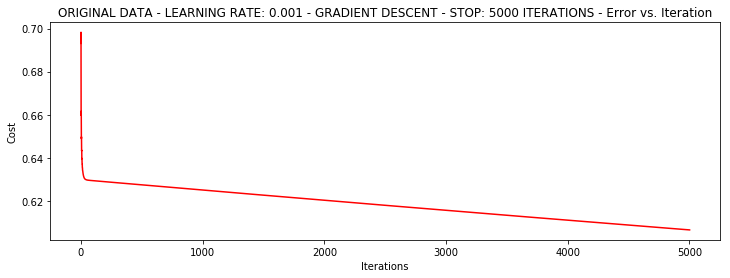

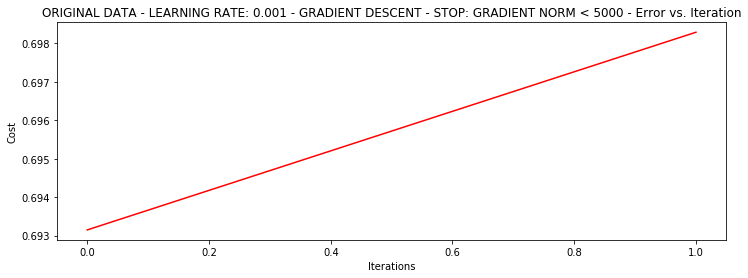

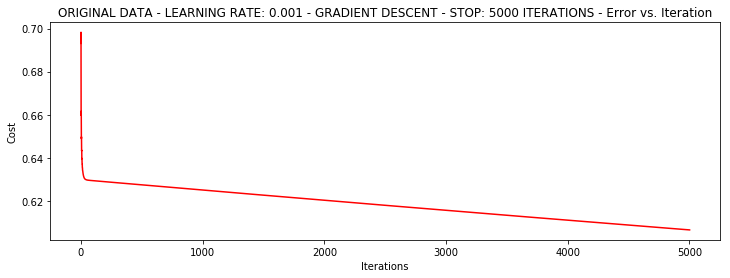

In [10]:
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)
runExpe(orig_data, theta, n, STOP_GRAD, thresh=5000, alpha=0.001)
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.3812159   0.06332483 -0.06770166]] - Iter: 5000 - Last cost: 1.09 - Duration: 0.36s
***Original data - learning rate: 1e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00097152  0.00893255  0.00194509]] - Iter: 15000 - Last cost: 0.63 - Duration: 0.99s


array([[-0.00097152,  0.00893255,  0.00194509]])

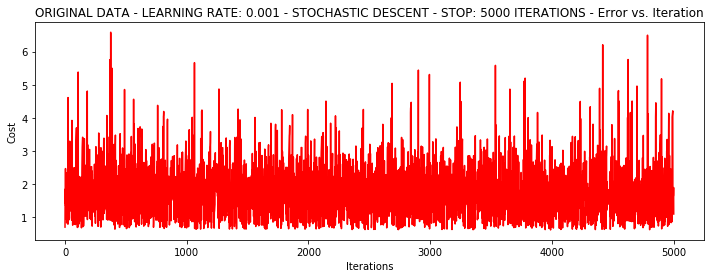

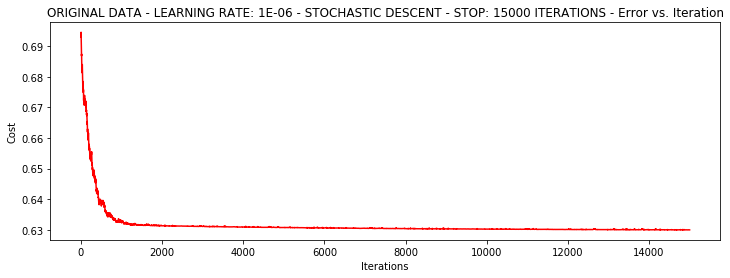

In [11]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)
runExpe(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000001)

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-1.03823482  0.02104611  0.01946694]] - Iter: 15000 - Last cost: 0.65 - Duration: 1.35s
***Original data - learning rate: 1e-06 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-0.00097398  0.00878017  0.00192132]] - Iter: 15000 - Last cost: 0.63 - Duration: 1.36s


array([[-0.00097398,  0.00878017,  0.00192132]])

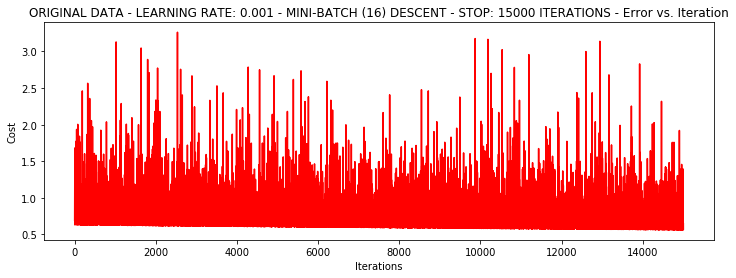

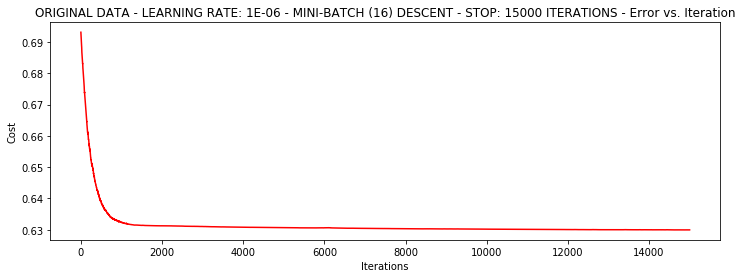

In [12]:
runExpe(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)
runExpe(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.000001)

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[0.3080807  0.86494967 0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 1.18s


array([[0.3080807 , 0.86494967, 0.77367651]])

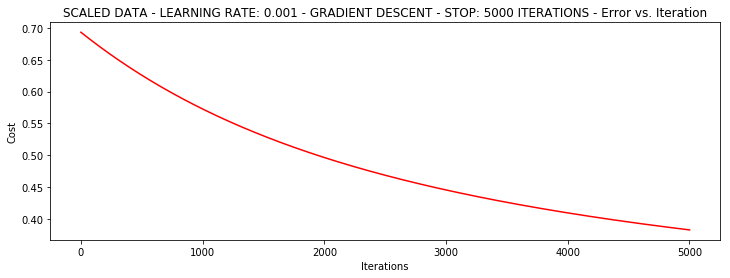

In [13]:
from sklearn import preprocessing as pp
scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])
runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.0004
Theta: [[1.47881092 3.48012527 3.23565294]] - Iter: 182587 - Last cost: 0.21 - Duration: 20.87s
accuracy = 89%


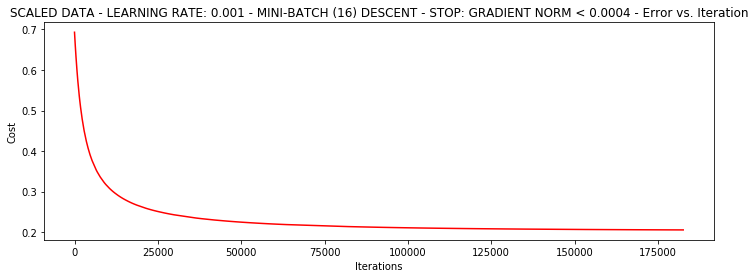

In [14]:
theta21=runExpe(scaled_data, theta, 16, STOP_GRAD, thresh=0.002/5, alpha=0.001)
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]
scaled_X = scaled_data[:, :3]
y = scaled_data[:, 3]
predictions = predict(scaled_X, theta21)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))